# Network Analysis Comparison between OSM and ENTSOE Data

This jupyter notebook explores a comparison between the OSM and ENTSOE data. The aim of this notebook is to compare open street map data against ENTSOE data. PyPSA-Earth and PyPSA-Europe uses different type of networ data namely OSM-Extracted and ENTSO-based respectively. The `elec.nc` have been taken as a network model which holds the most complete information on grid topology and capacity.

To run this notebook successfully, `osm_data` and `pypsa_eur_data` will need to be downloaded. The file size for `osm_data` and `pypsa_eur_data` are 3GB and 500MB respectively.
The files are currently stored in a google drive. You can download the files using their respective IDs.

- id for osm_data: 1AuUnJHO8ODyWsQBbdDyq8Bktw78W0219
- id for pypsa_eur-Eur data: 1EKuKtqQkewwPXyZDh9zgKwsfmwODCQEV

## Download files

If you have the data already, you can skip this section.

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

def download_from_google_drive(file_id, file_path):
    gdd.download_file_from_google_drive(
            file_id=file_id,
            dest_path=f"./{file_path}",
            showsize=True,
            unzip=False,
        )

In [2]:
# # download osm_data
# download_from_google_drive("1AuUnJHO8ODyWsQBbdDyq8Bktw78W0219", "elec-osm.nc")

# # download pypsa_eur_data
# download_from_google_drive("1EKuKtqQkewwPXyZDh9zgKwsfmwODCQEV", "elec-entsoe.nc")

## Network Analysis

In [3]:
# loading required libraries
import pypsa
import geopy
import matplotlib.pyplot as plt
import time

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000)

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading the data into variables
entsoe = pypsa.Network("elec-entsoe.nc")
osm = pypsa.Network("elec-osm.nc")


INFO:pypsa.io:Imported network elec-entsoe.nc has buses, carriers, generators, lines, links, loads, storage_units, transformers
INFO:pypsa.io:Imported network elec-osm.nc has buses, carriers, generators, lines, links, loads, storage_units, transformers


In [5]:
# filter for ac lines and voltage greater than or equals to 220.0kV
osm_df = osm.lines[(osm.lines['dc'] == False) & (osm.lines['v_nom'] >= 220.0)] \
        [['country', 'length', 'v_nom']] \
        .reset_index() \
        .drop(['Line'], axis=1)

entsoe_df = entsoe.lines[entsoe.lines['v_nom'] >= 220.0] \
        .merge(entsoe.buses['country'] \
        .reset_index(), 
            how='left', 
            left_on='bus0', 
            right_on='Bus')[['country', 'v_nom', 'length']]


### Intercomparison by data source

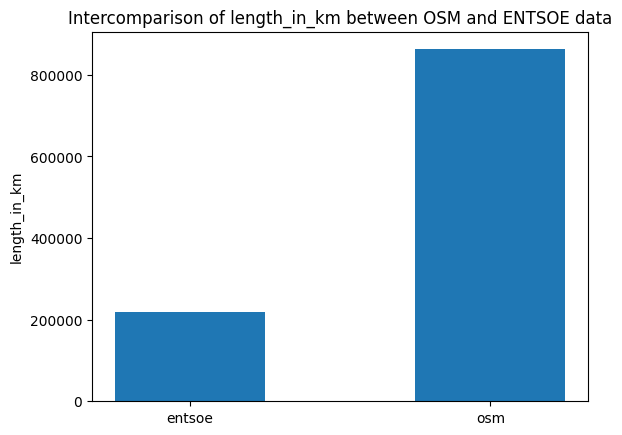

In [6]:
# Create a bar
plt.bar(['entsoe', 'osm'], [entsoe_df.length.sum(), osm_df.length.sum()], 0.5)
plt.title("Intercomparison of length_in_km between OSM and ENTSOE data")
plt.xlabel('')
plt.ylabel('length_in_km')
plt.show()


### Intercomparison by country

In [7]:
osm_country = osm_df.groupby(['country'])['length'].sum().reset_index()
entsoe_country = entsoe_df.groupby(['country'])['length'].sum().reset_index()


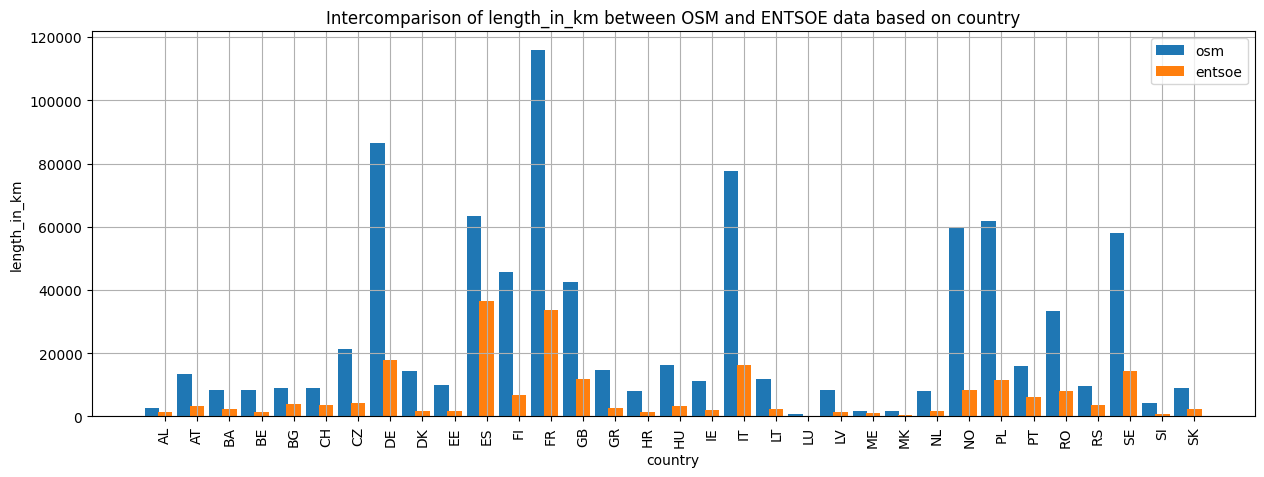

In [8]:
plt.figure(figsize=(15, 5))
osm_x_axis = np.arange(len(osm_country.country))
entsoe_x_axis = np.arange(len(entsoe_country.country))

plt.bar(osm_x_axis - 0.4, osm_country.length, 0.45, label='osm')
plt.bar(entsoe_x_axis, entsoe_country.length, 0.45, label='entsoe')
plt.xticks(osm_x_axis, osm_country.country)
plt.xticks(rotation=90)
plt.title(
    'Intercomparison of length_in_km between OSM and ENTSOE data based on country')
plt.xlabel('country')
plt.ylabel('length_in_km')
plt.grid(True)
plt.legend()
plt.show()


### Intercomparison by voltage levels

In [9]:
osm_voltage = osm_df.groupby(['v_nom'])['length'].sum().reset_index()
entsoe_voltage = entsoe_df.groupby(['v_nom'])['length'].sum().reset_index()


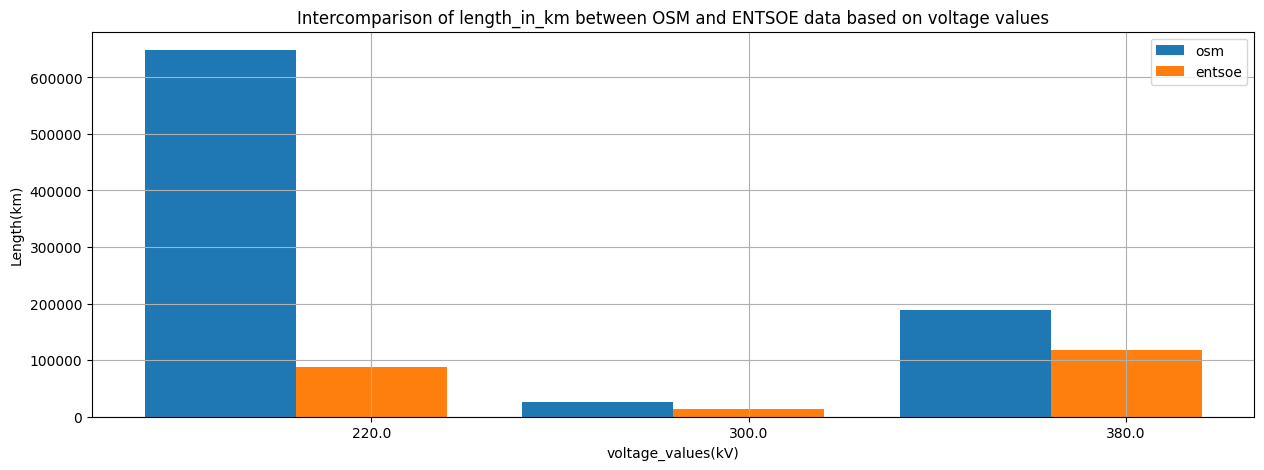

In [10]:
plt.figure(figsize=(15, 5))
osm_x_axis = np.arange(len(osm_voltage.v_nom))
entsoe_x_axis = np.arange(len(entsoe_voltage.v_nom))

plt.bar(osm_x_axis - 0.4, osm_voltage.length, 0.4, label='osm')
plt.bar(entsoe_x_axis, entsoe_voltage.length, 0.4, label='entsoe')
plt.xticks(osm_x_axis, osm_voltage.v_nom)
plt.xticks(rotation=0)
plt.title('Intercomparison of length_in_km between OSM and ENTSOE data based on voltage values')
plt.xlabel('voltage_values(kV)')
plt.ylabel('Length(km)')
plt.grid('True')
plt.legend()
plt.show()


# Conclusion

From the comparison above, it is observed that there is about 3x discrepancies between osm data and entsoe data. To understand the cause of the discrepancy, another notebook is being used for investigating the network using base network files for AT and MK.

Ref:
osm_validation_using_at_and_mk notebook